## Using ReservoirPy

In [39]:
import reservoirpy as rpy

In [1]:
# load dataset
from pandas import read_csv
GDP = read_csv(r"C:\Users\zhouq\OneDrive - Nanyang Technological University\FYP\Codes\FYP\GDP_transform.txt", header = 0, sep = "\t", index_col=0, parse_dates=True, dayfirst=False)

GDP = GDP.to_numpy()
print(len(GDP))
x_train, y_train = GDP[1:200], GDP[2:201]
# x_train, x_test = GDP.index[1:int(len(GDP)*0.8)], GDP.index[int(len(GDP)*0.8)+1:]
display(y_train)


244


array([[ 7.05354590e-04],
       [ 2.84484016e-03],
       [ 2.22282546e-02],
       [-5.40531605e-03],
       [ 4.88227507e-03],
       [-1.29171010e-02],
       [ 6.72637255e-03],
       [ 1.68318883e-02],
       [ 1.90139536e-02],
       [ 1.94211630e-02],
       [ 1.76792845e-02],
       [ 8.99605214e-03],
       [ 1.22102807e-02],
       [ 3.28361878e-03],
       [ 1.08565966e-02],
       [ 1.11587237e-02],
       [ 2.17461733e-02],
       [ 6.53462711e-03],
       [ 2.08633596e-02],
       [ 1.08284965e-02],
       [ 1.55022239e-02],
       [ 3.08395829e-03],
       [ 2.39093975e-02],
       [ 1.25538521e-02],
       [ 2.19889833e-02],
       [ 2.27789824e-02],
       [ 2.40507360e-02],
       [ 3.41019828e-03],
       [ 8.43338931e-03],
       [ 8.17060063e-03],
       [ 8.81654566e-03],
       [ 6.12790332e-04],
       [ 9.41673225e-03],
       [ 7.51188628e-03],
       [ 2.01898771e-02],
       [ 1.65699524e-02],
       [ 7.71968306e-03],
       [ 3.92548560e-03],
       [ 1.5

In [100]:
from reservoirpy.nodes import Reservoir, Ridge
rpy.verbosity(0)  # no need to be too verbose here
rpy.set_seed(42)  # make everything reproducible !

# offline learning
reservoir = Reservoir(120, lr=0.5)
ridge = Ridge(ridge=1e-7)

esn_model = reservoir >> ridge

readout = Ridge(ridge=1e-7)
train_states = reservoir.run(x_train, reset=True)
readout = readout.fit(train_states, y_train, warmup=10)

In [101]:
esn_model = esn_model.fit(x_train, y_train, warmup=10)
print(reservoir.is_initialized, readout.is_initialized, readout.fitted)



True True True


In [102]:
predictions = esn_model.run(GDP[201:-1])
predictions = esn_model.fit(x_train, y_train).run(GDP[201:-1])

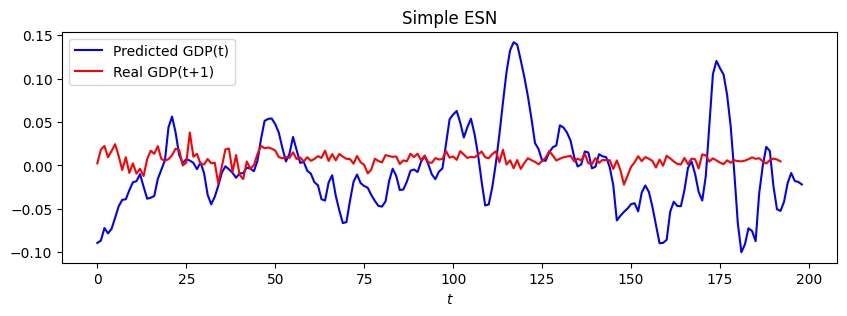

In [103]:
import matplotlib.pyplot as plt
Y_pred = esn_model.run(GDP[1:200])

plt.figure(figsize=(10, 3))
plt.title("Simple ESN")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted GDP(t)", color="blue")
plt.plot(GDP[51:], label="Real GDP(t+1)", color="red")
plt.legend()
plt.show()

In [105]:
from reservoirpy.observables import rmse, rsquare

print("RMSE:", rmse(GDP[202:], predictions), "R^2 score:", rsquare(GDP[202:], predictions))

RMSE: 0.052713513255204424 R^2 score: -225.29391800576443


## Using newToolbox_ESN

In [ ]:
from newToolbox_ESN import ESN, stateMatrixGenerator
from newToolbox_ESN_Multi import ESNMultiFrequency

ModuleNotFoundError: No module named 'pymoo.factory'